In [94]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading and Exploratory Data Analysis (EDA)

## Data Loading

In [95]:
# Importing libraries

import numpy as np
import pandas as pd

In [96]:
# Load the data
df = pd.read_csv('../data/raw/water_sanitation.csv')
df.head()

,entry_id,country,source_title,excerpt,geo_location,water_source,sanitation_type,sector,gender,age_group,...,water_color,water_clarity,water_odor,recent_rain,nearby_activities,nearby_infrastructure,vegetation_near_source,waste_disposal_nearby,animal_access,water_flow_rate
0,81a69ab1-6070-4643-ab31-062dabbe355d,Haiti,Skill may certainly off sing.,Health inspectors on site found that improper ...,5.937200,River,Open Defecation,Health,Female,Youth,...,clear,clear,chemical,no,farming,waste facilities,lush,managed sites,no,slow
1,e4774c0e-38ca-48bc-a62d-56ad7dc2ebf1,Ethiopia,Cup movie than fund artist.,The latest sanitation review indicated that im...,34.615215,Borehole,Composting Toilet,Public Infrastructure,Male,Youth,...,murky,turbid,sewage,yes,farming,waste facilities,sparse,none,yes,stagnant
2,ed103eee-2e27-4be4-b6fe-59e1b095a507,Nepal,Note Congress day million everybody environmen...,"According to recent field observations, waste ...",-68.387244,Truck Delivery,Pit Latrine,Health,Female,Adult,...,green,clear,sewage,no,mining,waste facilities,dead,managed sites,yes,flowing
3,4d8e529d-08cd-428b-b4a8-e4c4cbadeb33,India,Summer today southern.,The latest sanitation review indicated that ef...,-71.814776,Rainwater,Composting Toilet,Education,Male,Elderly,...,brown,turbid,sewage,no,mining,sewage lines,dead,managed sites,yes,slow
4,8396148f-36a8-4ee9-af7f-653b8d06aa9c,Kenya,Region sea nation fast shake born.,A comprehensive report issued by the agency no...,-10.132914,Borehole,Composting Toilet,Public Infrastructure,Female,Youth,...,murky,cloudy,none,no,none,waste facilities,lush,open dumping,no,stagnant


## Data Exploration

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   entry_id                4157 non-null   object 
 1   country                 4157 non-null   object 
 2   source_title            4157 non-null   object 
 3   excerpt                 4157 non-null   object 
 4   geo_location            4157 non-null   float64
 5   water_source            4157 non-null   object 
 6   sanitation_type         4157 non-null   object 
 7   sector                  4157 non-null   object 
 8   gender                  4157 non-null   object 
 9   age_group               4157 non-null   object 
 10  income_level            4157 non-null   object 
 11  infrastructure_type     4157 non-null   object 
 12  population_density      4157 non-null   object 
 13  climate_zone            4157 non-null   object 
 14  year                    4157 non-null   

In [98]:
df.columns

Index(['entry_id', 'country', 'source_title', 'excerpt', 'geo_location',
       'water_source', 'sanitation_type', 'sector', 'gender', 'age_group',
       'income_level', 'infrastructure_type', 'population_density',
       'climate_zone', 'year', 'organization', 'source_type',
       'special_needs_group', 'severity', 'water_color', 'water_clarity',
       'water_odor', 'recent_rain', 'nearby_activities',
       'nearby_infrastructure', 'vegetation_near_source',
       'waste_disposal_nearby', 'animal_access', 'water_flow_rate'],
      dtype='object')

In [99]:
df['excerpt'][0]

'Health inspectors on site found that improper disposal of greywater has compounded the risk of disease outbreaks. Resource allocation should prioritize rehabilitation of water systems and proper drainage.'

From the above explorartion our data contains 29 columns and 4157 rows of entries.

Some of the columns include **'excerpt'** which gives an observation of the environment around a water source or water point or just a decscription of how the water looks like. 

Other columns includes '**water_odor'** which clasifies water smells into either none, chemical and sewage while **'water_color'** clasifies water color color into either clear, brown, murky or green

Most of this Columns describe how the condition of water and the sourounding environment which might affect or give an indication if the water is contaminated or not

## Data Cleaning

### Missing/Null-values

In [100]:
# Checking for missing/null values
for col in  df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col} : {df[col].isna().sum()}')

special_needs_group : 779


- From the above cell only **'special_needs_group'** column contains 779 missing / null-values

In [101]:
df['special_needs_group'].value_counts()

special_needs_group
Children Under 5    891
Elderly             834
Disabled            831
Pregnant Women      822
Name: count, dtype: int64

In [102]:
# Replace missing with 'none' instead of having 'None' which reads as Null-Value
df['special_needs_group'] = df['special_needs_group'].fillna('none')
df['special_needs_group'].value_counts()

special_needs_group
Children Under 5    891
Elderly             834
Disabled            831
Pregnant Women      822
none                779
Name: count, dtype: int64

### Duplicates

In [103]:
# Checking for duplicated entries
df.duplicated().sum()

1157

In [104]:
df = df.drop_duplicates()
print(f'Duplicated entries : {df.duplicated().sum()}')

Duplicated entries : 0


In [105]:
# df.to_csv('../data/processed/water_sanitation_clean.csv')

## Analysis

In [106]:
# Library importation
import seaborn as sns
import matplotlib.pyplot as plt

### Water Contamination Severity over Time

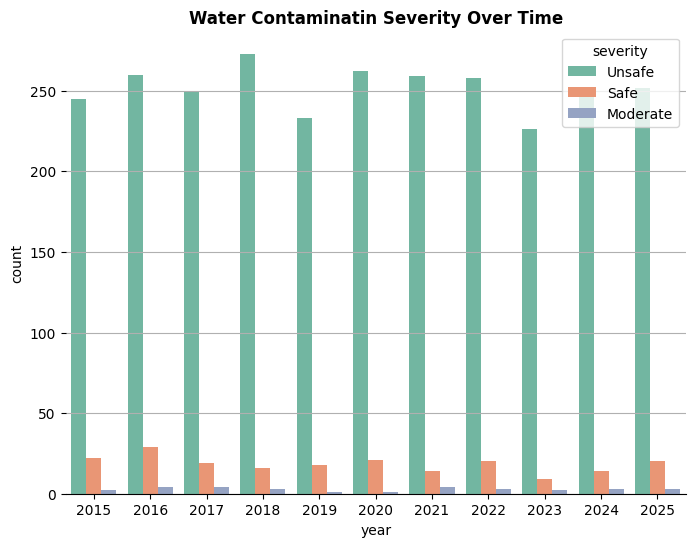

In [107]:
# Bar Plot showing contamination numbers in years

plt.figure(figsize = (8, 6))

sns.countplot(data = df, x='year', hue='severity', palette='Set2')
plt.title('Water Contaminatin Severity Over Time', weight = 'bold')
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

### Water Contamination By countries

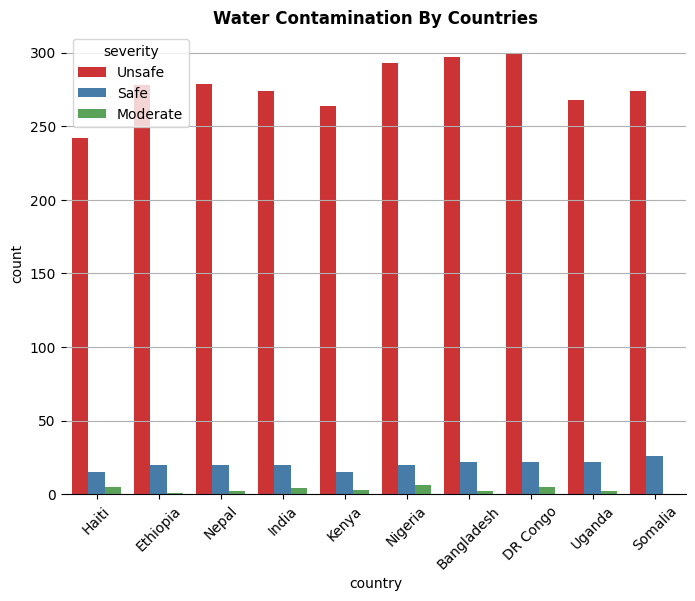

In [108]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'country', hue = 'severity', palette = 'Set1')
plt.title('Water Contamination By Countries', weight = 'bold')
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

### Source Type By Organization

In [109]:
source_df = pd.crosstab(df['organization'], df['source_type'])
source_df


source_type,Academic Paper,Field Survey,Gov Report,NGO Report
organization,,,,
Red Cross,160,153,140,140
Save the Children,150,167,128,146
UNICEF,150,164,148,136
WHO,140,131,151,167
Water.org,154,169,159,147


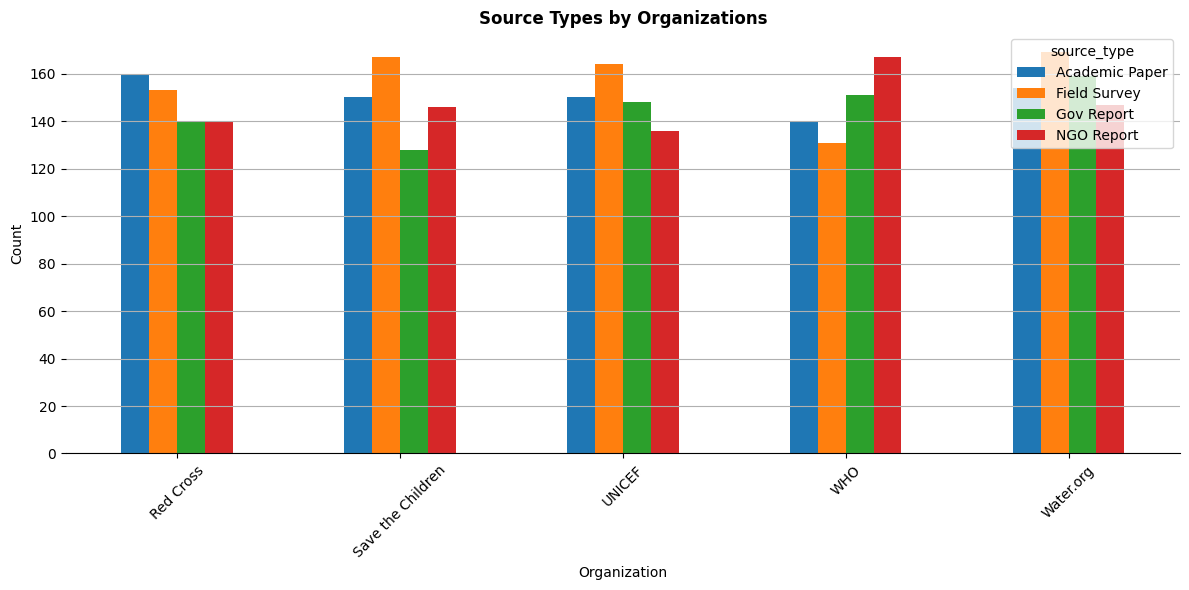

In [110]:
source_df.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Source Types by Organizations', weight='bold')
plt.xlabel('Organization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()


### Age Group Distribution

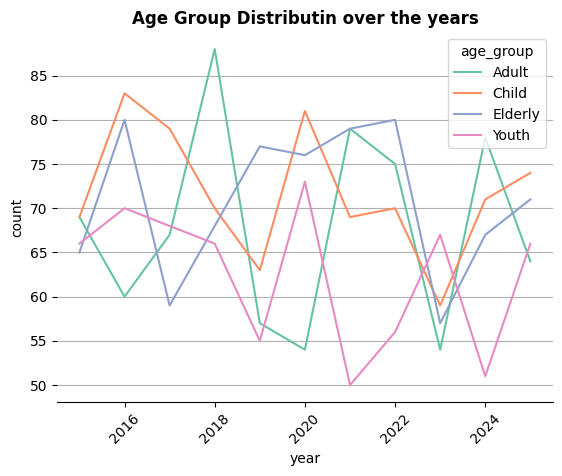

In [111]:
age_by_year = df.groupby(['year', 'age_group']).size().reset_index(name='count')

sns.lineplot(data=age_by_year, x='year', y='count', hue='age_group', palette='Set2')
plt.title('Age Group Distributin over the years', weight = 'bold')
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

# NLP Modeling

For the nlp model our target variable will be **'severity'** which classifies water as **safe**, **moderate** or **unsafe**.

We will need to create/ engineer our targe varible to by a binary clasification by making **moderate** belong to **unsafe** class since you can't have moderate or extreme contamination in water

## Preprocessing

### Cleaning

In [112]:
import nltk
print(nltk.__version__)  # Should say 3.8.1

nltk.download('punkt')
nltk.download('stopwords')


3.8.1


[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
# Library importation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#cleaning + lemmatization function
def clean_text(text):
    if pd.isnull(text):
        return ""
    
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

# Apply to DataFrame
df['clean_excerpt'] = df['excerpt'].apply(clean_text)
df['clean_excerpt'].head()


[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    health inspector site found improper disposal ...
1    latest sanitation review indicated improper di...
2    according recent field observation waste manag...
3    latest sanitation review indicated effort dist...
4    comprehensive report issued agency noted impro...
Name: clean_excerpt, dtype: object

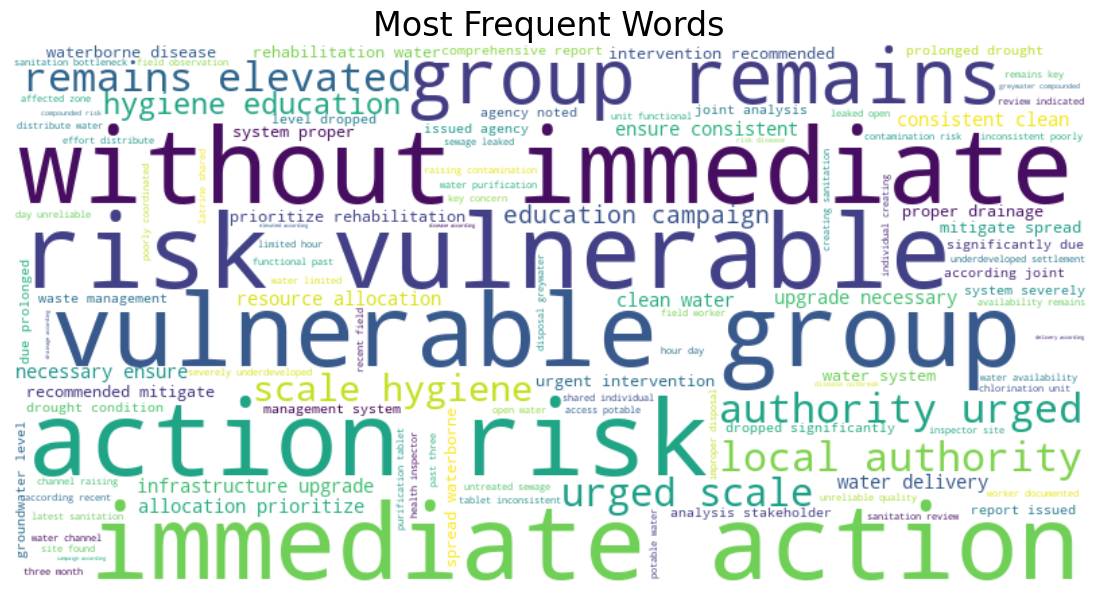

In [114]:
from collections import Counter
from wordcloud import WordCloud

all_words = ' '.join(df['clean_excerpt']).split()
word_freq = Counter(all_words)
word_freq.most_common(20)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words', fontsize=24)
plt.show()



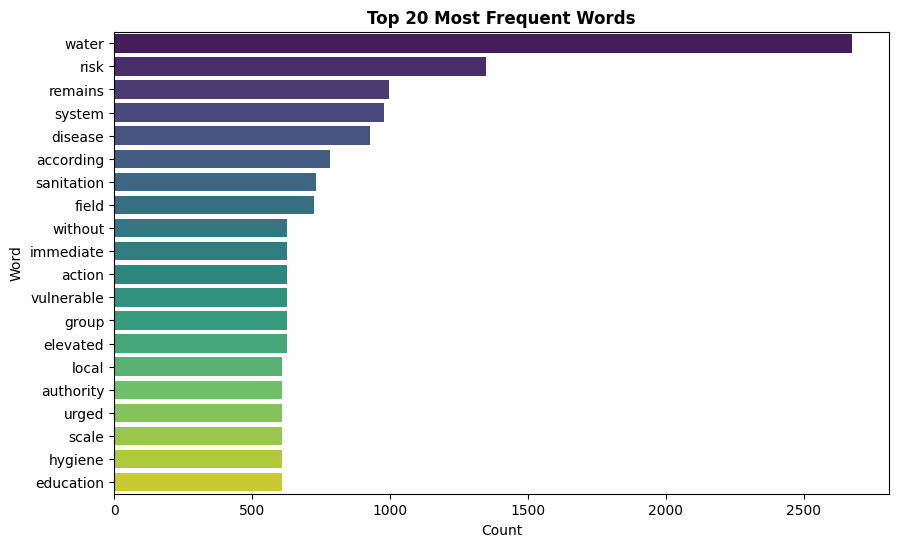

In [115]:
#TOP 20 WORDS
top_n = 20
common_words = word_freq.most_common(top_n)
word_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=word_df, x='count', y='word', hue = 'word', palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words", weight='bold')
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

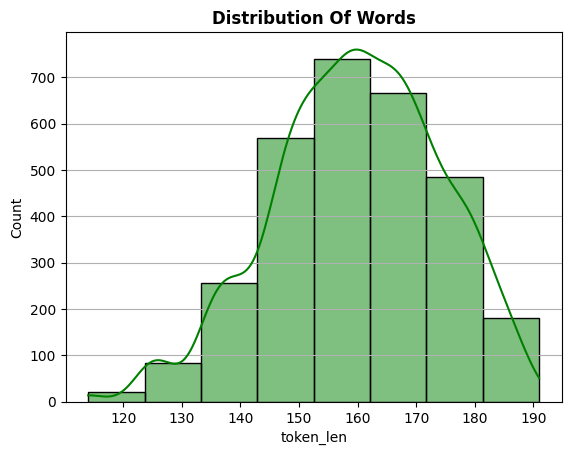

In [116]:
#word distribution Frequency
df['token_len'] = df['clean_excerpt'].apply(len)
df['token_len'].head()

#Ploting
sns.histplot(x = df['token_len'], bins = 8, kde = True, color = 'green')
plt.title('Distribution Of Words', weight = 'bold')
plt.grid(axis = 'y')
plt.show()

### Feature Engineering

For this part we are going to engineer **'severity'** column to have only a bimodal classification thats removing ***'moderate'*** class to be ***'unsafe'***

In [117]:
df['severity'].value_counts()

severity
Unsafe      2768
Safe         202
Moderate      30
Name: count, dtype: int64

In [118]:
df['severity'] = df['severity'].apply(lambda x: 'Unsafe' if x == 'Moderate' else x)
df['severity'].value_counts()


severity
Unsafe    2798
Safe       202
Name: count, dtype: int64

### Bigrams/Trigrams Analysis

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigrams
bigram_vec = CountVectorizer(ngram_range=(2, 2), max_features=20)
X_bigrams = bigram_vec.fit_transform(df['clean_excerpt'])

# Top 20 bigrams
bigrams = pd.DataFrame(X_bigrams.toarray(), columns=bigram_vec.get_feature_names_out())
bigrams.sum().sort_values(ascending=False)

action risk               626
group remains             626
vulnerable group          626
risk vulnerable           626
remains elevated          626
immediate action          626
without immediate         626
hygiene education         607
authority urged           607
education campaign        607
scale hygiene             607
urged scale               607
local authority           607
ensure consistent         598
infrastructure upgrade    598
necessary ensure          598
consistent clean          598
upgrade necessary         598
clean water               598
water delivery            598
dtype: int64

### TF-IDF Analysis

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vec.fit_transform(df['clean_excerpt'])

# View top TF-IDF terms
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vec.get_feature_names_out())
tfidf_df.sum().sort_values(ascending=False).head(20)


water         304.936893
risk          212.273337
system        180.785163
remains       177.953279
disease       175.124537
according     153.344168
sanitation    151.443611
field         148.279345
action        132.936685
immediate     132.936685
elevated      132.936685
without       132.936685
group         132.936685
vulnerable    132.936685
scale         131.826864
urged         131.826864
education     131.826864
local         131.826864
campaign      131.826864
authority     131.826864
dtype: float64

### Word Association / Co-occurrence

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df['clean_excerpt'])
Xc = (X.T @ X)

# Convert to dataframe
co_occurrence_df = pd.DataFrame(data=Xc.toarray(), index=cv.get_feature_names_out(), columns=cv.get_feature_names_out())

# View top associations for a word
co_occurrence_df['water'].sort_values(ascending=False).head(10)


water             4107
system            1090
risk              1044
remains            972
necessary          893
ensure             893
upgrade            893
infrastructure     893
delivery           893
clean              893
Name: water, dtype: int64

## Modeling

### Simple Baseline Logistic Model

In [122]:
#Library importation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, precision_score, recall_score, f1_score,
                             RocCurveDisplay, roc_auc_score, roc_curve)


In [123]:
# Encode the target variable
le = LabelEncoder()
df['severity_encoded'] = le.fit_transform(df['severity'])

#define X and y
X = df['clean_excerpt']
y = df['severity_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

# Initialize and train the model
simp_model = LogisticRegression(max_iter=1000, random_state=42, class_weight = 'balanced')
simp_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [124]:
# Make predictions then evaluate model
y_preds = simp_model.predict(X_test)
y_probs = simp_model.predict_proba(X_test)[:, 1]

#Evaluate the model
print(f'Accuracy Score : {accuracy_score(y_test, y_preds)}')
print(f'precision Score : {precision_score(y_test, y_preds)}')
print(f'Recall Score : {recall_score(y_test, y_preds)}')
print(f'F1 Score = {f1_score(y_test, y_preds)}')
print(f'Classification Report : \n{classification_report(y_test, y_preds)}\n')
print(f'ROC_AUC Score : {roc_auc_score(y_test, y_probs)}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm

Accuracy Score : 0.5783333333333334
precision Score : 0.9475218658892128
Recall Score : 0.5803571428571429
F1 Score = 0.7198228128460687
Classification Report : 
              precision    recall  f1-score   support

           0       0.09      0.55      0.15        40
           1       0.95      0.58      0.72       560

    accuracy                           0.58       600
   macro avg       0.52      0.57      0.43       600
weighted avg       0.89      0.58      0.68       600


ROC_AUC Score : 0.5944866071428572


array([[ 22,  18],
       [235, 325]], dtype=int64)

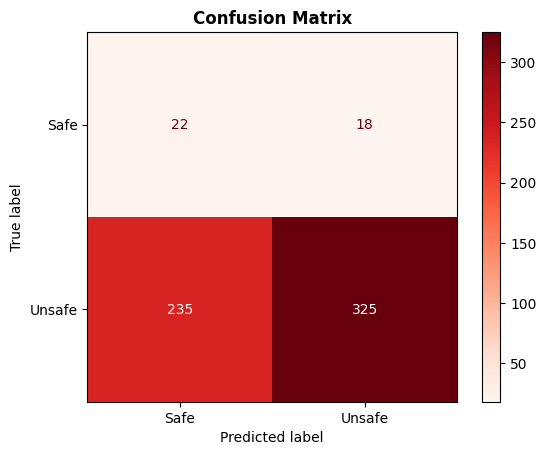

In [125]:
# Ploting our model performance
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = le.classes_)
disp.plot(cmap = 'Reds')
plt.title('Confusion Matrix', weight = 'bold')
plt.show()

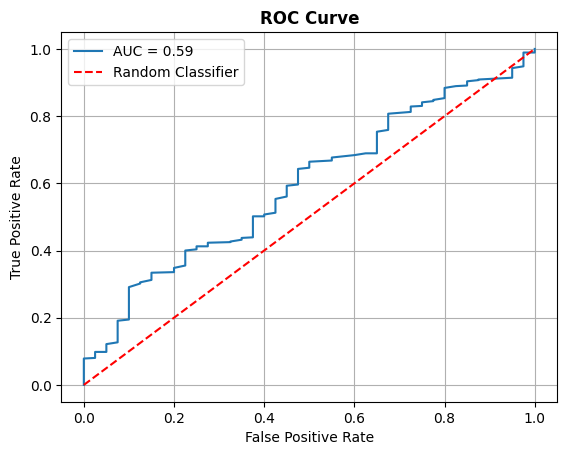

In [126]:
# Roc Curve plot
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.title('ROC Curve', weight='bold')
plt.grid()
plt.legend()
plt.show()

The most important metric we should conside here is the recall score sine we are trying to find out ***Out of all truly **Unsafe** water sources, how many did we correctly identify?*** which is consinderably low for our base model which ***0.5804***. Maybe using a better powerfull model will help improve our score.

### NLP RandomForest

In [127]:
# Library importation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [134]:
# initialize the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# initialize GridSearchCV
GridSearchCV_model = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                                  scoring='f1_macro', cv=3, verbose=2, n_jobs=-1)
# Fit the model
GridSearchCV_model.fit(X_train, y_train)

# Best parameters
best_params = GridSearchCV_model.best_params_
print(f'Best Parameters: {best_params}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [133]:
# Make predictions with the best model
best_rf_model = GridSearchCV_model.best_estimator_
y_preds_rf = best_rf_model.predict(X_test)
y_probs_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the best model
print(f'Accuracy Score : {accuracy_score(y_test, y_preds_rf)}')
print(f'precision Score : {precision_score(y_test, y_preds_rf)}')
print(f'Recall Score : {recall_score(y_test, y_preds_rf)}')
print(f'F1 Score = {f1_score(y_test, y_preds_rf)}')
print(f'Classification Report : \n{classification_report(y_test, y_preds_rf)}\n')
print(f'ROC_AUC Score : {roc_auc_score(y_test, y_probs_rf)}')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_preds_rf)
cm_rf

Accuracy Score : 0.8116666666666666
precision Score : 0.9390962671905697
Recall Score : 0.8535714285714285
F1 Score = 0.8942937324602432
Classification Report : 
              precision    recall  f1-score   support

           0       0.10      0.23      0.14        40
           1       0.94      0.85      0.89       560

    accuracy                           0.81       600
   macro avg       0.52      0.54      0.52       600
weighted avg       0.88      0.81      0.84       600


ROC_AUC Score : 0.6039508928571429


array([[  9,  31],
       [ 82, 478]], dtype=int64)

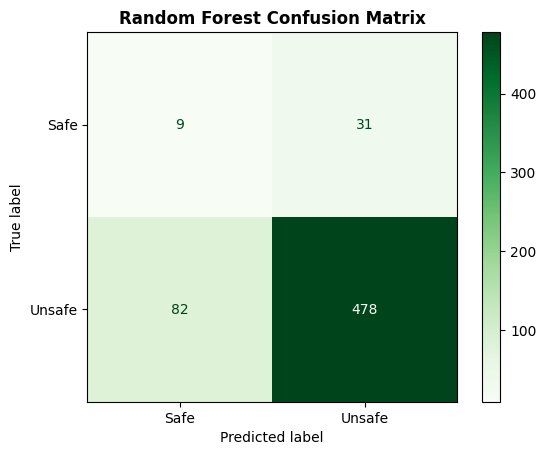

In [130]:
# Ploting our model performance
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = le.classes_)
disp.plot(cmap = 'Greens')
plt.title('Random Forest Confusion Matrix', weight = 'bold')
plt.show()

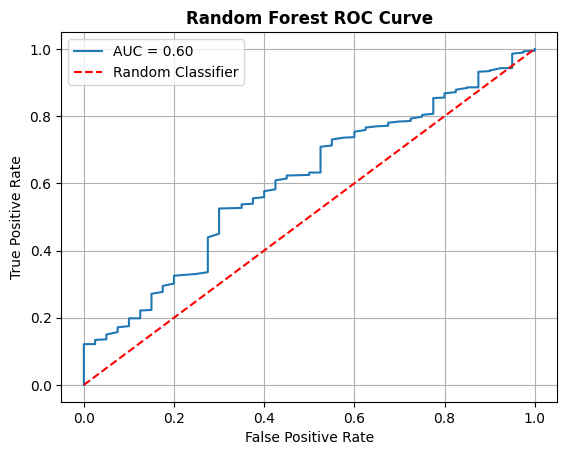

In [131]:
# Roc Curve plot
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_probs_rf)
roc_auc = roc_auc_score(y_test, y_probs_rf)
RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc).plot()
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.title('Random Forest ROC Curve', weight='bold')
plt.grid()
plt.legend()
plt.show()

The ***RandomForestClassifier*** performs better than our baseline model with an improved recall score of **0.8536** by using a GridSearchCV to get the best model parameters

***Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}***

###  Improving and Optimizing the RandomForestClassifer

In [135]:
# Finding the best model
rf_model2 = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

# Increase the range of hyperparameters to find the best performig model
param_grid2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
GridSearchCV_model2 = GridSearchCV(estimator=rf_model2, param_grid=param_grid2,
                                   scoring='f1_macro', cv=5, verbose=2, n_jobs=-1)

# fit grid search
GridSearchCV_model2.fit(X_train, y_train)

# Find best parameters
best_params2 = GridSearchCV_model2.best_params_
print(f'Best Parameters (Extended Search): {best_params2}')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters (Extended Search): {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [136]:
# Make predictions with the best model
best_model = GridSearchCV_model2.best_estimator_
y_preds_rf2 = best_model.predict(X_test)
y_probs_rf2 = best_model.predict_proba(X_test)[:, 1]

# Evaluate the best model
print(f'Accuracy Score : {accuracy_score(y_test, y_preds_rf2)}')
print(f'precision Score : {precision_score(y_test, y_preds_rf2)}')
print(f'Recall Score : {recall_score(y_test, y_preds_rf2)}')
print(f'F1 Score = {f1_score(y_test, y_preds_rf2)}')
print(f'Classification Report : \n{classification_report(y_test, y_preds_rf2)}\n')
print(f'ROC_AUC Score : {roc_auc_score(y_test, y_probs_rf2)}')

# Confusion Matrix
best_rf_cm = confusion_matrix(y_test, y_preds_rf2)
best_rf_cm

Accuracy Score : 0.815
precision Score : 0.9376218323586745
Recall Score : 0.8589285714285714
F1 Score = 0.896551724137931
Classification Report : 
              precision    recall  f1-score   support

           0       0.09      0.20      0.13        40
           1       0.94      0.86      0.90       560

    accuracy                           0.81       600
   macro avg       0.51      0.53      0.51       600
weighted avg       0.88      0.81      0.85       600


ROC_AUC Score : 0.6174330357142858


array([[  8,  32],
       [ 79, 481]], dtype=int64)

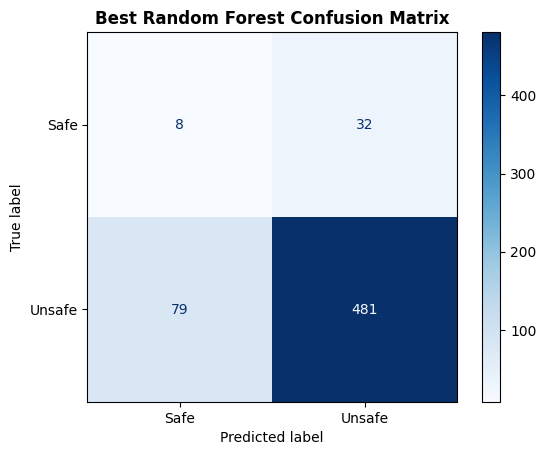

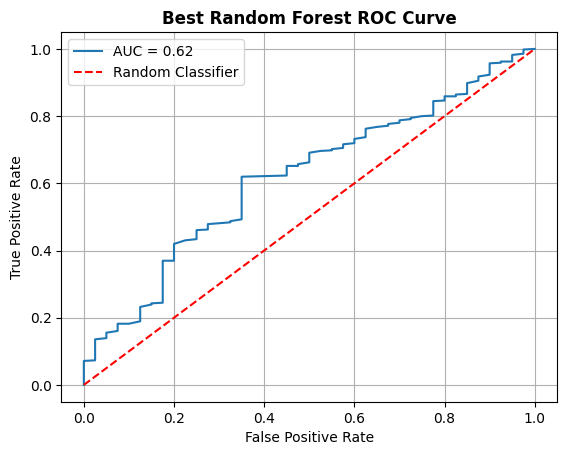

In [138]:
# Ploting Best model Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = best_rf_cm, display_labels = le.classes_)
disp.plot(cmap = 'Blues')
plt.title('Best Random Forest Confusion Matrix', weight = 'bold')
plt.show()

# Roc Curve plot for the best model
fpr_best_rf, tpr_best_rf, thresholds = roc_curve(y_test, y_probs_rf2)
roc_auc_best_rf = roc_auc_score(y_test, y_probs_rf2)
RocCurveDisplay(fpr=fpr_best_rf, tpr=tpr_best_rf, roc_auc=roc_auc_best_rf).plot()
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.title('Best Random Forest ROC Curve', weight='bold')
plt.grid()
plt.legend()
plt.show()

Slight improvement from initial random forest classifier with a recall score of 0.8589